## 完整程式碼

In [5]:
class TreeNode:
    def __init__(self,val):
        self.val=val
        self.left=None
        self.right=None

class Solution: 
    def __init__(self):
        self.m=[]
        self.h=[]
    
    def insert(self,root,val):
        if root.val==None:
            root.val=val
        else:
            if root!=None:
                if val <= root.val:
                    if root.left==None:
                        root.left=TreeNode(val)
                    else:
                        root=root.left
                        self.insert(root,val)
                elif val > root.val:
                    if root.right==None:
                        root.right=TreeNode(val)
                    else:
                        root=root.right
                        self.insert(root,val)
    
    def search(self,root,target):
        cur=None
        if root!=None:            
            if root.val==None:
                return None
            if target==root.val:
                return root
            else:   
                if target < root.val:
                    root=root.left
                    cur=self.search(root,target)
                elif target > root.val:
                    root=root.right
                    cur=self.search(root,target)
        else:
            return None
        return cur
        
    def delete(self,root,target):
        import copy
        root_original=copy.deepcopy(root)
        while self.search(root,target) != None:
            self.delete_once(root,target)
        if self.max_height(root) > self.max_height(root_original):
            self.rebuild(root,root_original)
        return root
    
    def delete_once(self,root,target):
        pre_cur=root
        cur=root
        while cur!=None:        
           if cur.val!=target:
                pre_cur=cur
                if cur.val >= target:
                    cur=cur.left
                elif cur.val < target:
                    cur=cur.right
           else:
               break
        if cur==None:
            return       
        if cur.left==None and cur.right==None:
            if pre_cur.left==None and pre_cur.right==None:
                cur.val=None
            else:
                if pre_cur.left==cur:
                    pre_cur.left=None
                elif pre_cur.right==cur:
                    pre_cur.right=None                   
        elif cur.left==None or cur.right==None:
            if cur.left!=None:
                cur.val=cur.left.val                        
                cur.right=cur.left.right
                cur.left=cur.left.left                                                                                                                                                 
            elif cur.right!=None:
                cur.val=cur.right.val
                cur.left=cur.right.left
                cur.right=cur.right.right                        
        elif cur.left!=None and cur.right!=None:
            cur2=cur
            cur2=cur.right                    
            if cur2.left==None:
                cur.val=cur2.val
                cur.right=cur2.right
            else:     
                while cur2.left != None:
                    cur2=cur2.left
                cur2.left=cur.left
                cur.val=cur.right.val
                cur.left=cur.right.left
                cur.right=cur.right.right
            
    def rebuild(self,root,root_original):
        if root.val==None:
            return
        if self.max_height(root) <= 2:
            return
        l=self.pop(root)
        self.m=[]
        HH=self.max_height(root_original)
        H=999
        L=None
        for k in range(20):
            l=self.sampling(l)
            n=TreeNode(l[0])
            for i in l[1::]:
                self.insert(n,i)
            h=self.max_height(n)
            if h <= HH:
                L=l
                break
            if h <= H:
                H=h
                L=l
        for i in l:
            self.delete_once(root,i)
        for i in L:
            self.insert(root,i)    
        return root
              
    def modify(self,root,target,new_val):
        if root.val==None:
            return
        ll=self.pop(root)
        l=self.replace(target,new_val,ll)
        HH=self.max_height(root)
        H=999
        L=None
        for k in range(20):
            l=self.sampling(l)
            n=TreeNode(l[0])
            for i in l[1::]:
                self.insert(n,i)
            h=self.max_height(n)
            if h <= HH:
                L=l
                break
            if h <= H:
                H=h
                L=l
        for i in ll:
            self.delete_once(root,i)
        for i in L:
            self.insert(root,i)    
        return root
                   
    def max_height(self,root):
        num=0
        self.count_height(root,num)
        maximum=max(self.h)
        self.h=[]
        return maximum
               
    def count_height(self,root,num):
        if root!=None:
            num+=1
            self.count_height(root.left,num)
            self.count_height(root.right,num)
        else:
            self.h.append(num)    
    
    def pop(self,root):
        if root!=None:
            self.m.append(root.val)
            self.pop(root.left)
            self.pop(root.right)
        ll=self.m
        return ll
    
    def replace(self,target,new_val,ll):
        self.m=[]
        l=[]
        for i in range(len(ll)):
            if ll[i]==target:
                l.append(new_val)
            else:
                l.append(ll[i])
        return l
    
    def sampling(self,l):
        import random
        return random.sample(l,len(l))
           
    def pre_order(self,root):
        if root!=None:
            print(root.val,'',end='')
            self.pre_order(root.left)
            self.pre_order(root.right)

# 新增

In [ ]:
class Solution:       
    def insert(self,root,val):
        if root.val==None:
            root.val=val
        else:
            if root!=None:
                if val <= root.val:
                    if root.left==None:
                        root.left=TreeNode(val)
                    else:
                        root=root.left
                        self.insert(root,val)
                        return root
                elif val > root.val:
                    if root.right==None:
                        root.right=TreeNode(val)
                    else:
                        root=root.right
                        self.insert(root,val)
                        return root

每當新增一個數值時，都會先從根節點開始向下訪尋，如果欲新增的數值小於等於訪尋到的節點的數值，則向該節點的左子節點訪尋；如果欲新增的數值大於訪尋到的節點的數值，則向該節點的右子節點訪尋，直到最後的葉節點(無任何子節點)為止，如果欲新增的數值小於等於該葉節點，則新增為該葉節點的左子節點；反之則新增為該葉節點的右子節點。

1. 輸入欲新增數值的樹狀結構的根節點(root)和欲新增的數值進入insert函式中。
2. 如果根節點的val為None，則將根節點的val賦值為欲新增的數值。
3. 如果欲新增的數值小於等於訪尋到的節點的數值，則將新的根節點定義為訪尋到的節點的左子節點；反之則定義為右子節點，然後帶入insert函式中進行遞迴。
4. 直到遞迴到所輸入的根節點的左子節點為None並且欲新增的數值又小於等於所輸入的根節點的數值時，則在該根節點的左子節點新增包含欲新增的數值得TreeNode；反之，或是直到遞迴到所輸入的根節點的右子節點為None並且欲新增的數值又大於所輸入的根節點的數值時，在該根節點的右子節點新增包含欲新增的數值得TreeNode。
5. 遞迴的終止條件為當輸入的根節點為None時，也就是走訪超過最後的葉節點(無任何子節點)時停止。

In [42]:
n=TreeNode(None)
for i in [12,6,6,6,9,7,8,10,18,16,14,17,26,20,22,23,28]:
    Solution().insert(n,i)
Solution().pre_order(n)

12 6 6 6 9 7 8 10 18 16 14 17 26 20 22 23 28 

# 查詢

In [ ]:
class Solution:    
    def search(self,root,target):
        cur=None
        if root!=None:            
            if root.val==None:
                return None
            if target==root.val:
                return root
            else:   
                if target < root.val:
                    root=root.left
                    cur=self.search(root,target)
                elif target > root.val:
                    root=root.right
                    cur=self.search(root,target)
        else:
            return None
        return cur

每當搜尋一個數值時，都會先從根節點開始向下訪尋，如果欲搜尋的數值小於訪尋到的節點的數值，則向該節點的左子節點訪尋；如果欲搜尋的數值大於訪尋到的節點的數值，則向該節點的右子節點訪尋，直到訪尋到數值與欲搜尋的數值相同的節點為止為止，並回傳該節點，而該節點也會是樹狀結構中所有有相同數值的節點中離該節點最近的節點。

1. 輸入欲搜尋數值的樹狀結構的根節點(root)和欲搜尋的數值進入search函式中。
2. 如果輸入的根節點的數值為None，則回傳None
3. 如果欲搜尋的數值小於訪尋到的節點的數值，則將新的根節點定義為訪尋到的節點的左子節點；反之則定義為右子節點，然後帶入search函式中進行遞迴。
4. 直到遞迴到所輸入的根節點的數值等於欲搜尋的數值，並回傳該根節點。其中因為回傳的指令(return)，遞迴的程式就會終止，並且不斷回傳到最上層程式的cur中，然而return cur，而那個cur就是欲搜尋的節點。
5. 如果都沒有訪尋到欲搜尋的節點，遞迴的中止條件為當輸入的根節點為None時，也就是走訪超過最後的葉節點(無任何子節點)時停止。

In [9]:
node=Solution().search(n,6)
print(node.val)
print(node.left.val)
print(node.right.val)

6
6
9


# 修改

In [ ]:
class Solution:
    def __init__(self):
        self.m=[]
        self.h=[]
        
    def modify(self,root,target,new_val):
        if root.val==None:
            return
        HH=self.max_height(root)
        ll=self.pop(root)
        l=self.replace(target,new_val,ll)
        l_m=self.median(l)
        performance_median=False
        n=TreeNode(l_m[0])                
        for i in l_m[1::]:
            self.insert(n,i)
        h=self.max_height(n)
        if h <= HH:
            L=l_m
            performance_median=True            
        if performance_median==False:            
            H=999
            L=None
            for k in range(20):
                l=self.sampling(l)
                n=TreeNode(l[0])
                for i in l[1:]:
                    self.insert(n,i)
                h=self.max_height(n)
                if h <= HH:
                    L=l
                    break
                if h <= H:
                    H=h
                    L=l
        for i in ll:
            self.delete_once(root,i)
        for i in L:
            self.insert(root,i)    
        return root
                   
    def max_height(self,root):
        num=0
        self.count_height(root,num)
        maximum=max(self.h)
        self.h=[]
        return maximum
               
    def count_height(self,root,num):
        if root!=None:
            num+=1
            self.count_height(root.left,num)
            self.count_height(root.right,num)
        else:
            self.h.append(num)    
    
    def pop(self,root):
        if root!=None:
            self.r.append(root.val)
            self.pop(root.left)
            self.pop(root.right)
        ll=self.r
        return ll
    
    def replace(self,target,new_val,ll):
        self.r=[]
        l=[]
        for i in range(len(ll)):
            if ll[i]==target:
                l.append(new_val)
            else:
                l.append(ll[i])
        return l
    
                
    def sampling(self,l):
        import random
        return random.sample(l,len(l))   
    
    def median(self,ary):
        self.pop_median(ary)
        ary_median=self.m
        self.r=[]
        self.m=[]
        ary=sorted(ary)
        ary_median.append(ary[0])
        return ary_median
    
    def pop_median(self,ary):
        ary=sorted(ary)
        length=len(ary)
        if length > 1:
            base = length // 2
            self.m.append(ary[base])
            left=ary[:base]
            right=ary[base:]
            self.pop_median(left)
            self.pop_median(right)   

當要將所有樹狀結構的數值修改為新數值時，需要先把樹狀結構中所有數值與欲修改的數值相同的節點刪除，再新增新的數值進入樹狀結構。為了讓新的樹狀結構的樹高小於等於原來的樹高，還需要重新整理樹狀結構。整裡方式是訪尋所有的節點並把訪尋到的節點的數值儲存在陣列中，然後隨機排列各種順序insert，去建立不同的樹狀結構，值到該樹狀結構的樹高小於等於原來樹狀結構為止。

程式碼僅pre-order走訪有參考外部資料，其他部分都為原創程式碼。

1. 輸入欲修改的樹狀結構的根節點、欲修改的數值、欲修改為的數值進入modify函式中。
2. 如果輸入的樹狀結構的根節點的數值為None，則不做修改。
3. 利用pop函數訪尋所有節點(pre-order走訪)並將訪尋到的節點的數值append進__init__中的陣列r中。
4. 利用replace函數將r陣列中所有要修改的數值修改成要修改為的數值。
5. 利用max_height函數計算原本樹狀結構的樹高，計算方式是先設一個初始高度，用pre-order走訪所有節點，每走訪一個父節點高度就加一，當走訪到最後的葉節點時(無任何子節點)再加一並將高度append進__init__裡的陣列h中。當依序走訪完所有葉節點時，陣列理會有多的不同的高度，再取一個最大值當作該樹狀結構的最大高度。
6. 接著用個種排序方式去insert陣列r中的數值，建立不同樹狀結構，只要有樹狀結構小於等於原本樹狀結構，就返回這個樹狀結構。第一種排序方式是用median函數排序，方法是先將數列r按大小排序，append中位數進__init__中的陣列m中，接著以該中位數為中心點分成兩個陣列，並分別append陣列的中位數進陣列m中，並再將該兩個陣列各自分成兩個陣列append中位數，以此類推，最後再將陣列m中數值依序insert建立樹狀結構，如果該樹狀結構的樹高小於等於原來的樹高則做為最後樹狀結構。該方法的目的是為了平衡地新增數值讓樹狀結構達到平衡。
7. 如果第一種方法無法讓樹高小於等於原來樹高，則將陣列r做20種隨機排序，如果有一種排序能使樹高小於等於原來的樹高就以該排序去建立樹狀結構，如果均無法小於等於則回傳能使樹高最小的排序的數列。
8. 最後再將原本輸入的樹狀結構的數值全部刪除，並用前面方法找到的數列去insert數值，重新建立新的樹狀結構。

In [21]:
import copy
root1=copy.deepcopy(n)
Solution().pre_order(root1)
print('\n',Solution().max_height(root1))

root2=Solution().modify(n,6,12)
Solution().pre_order(root2)
print('\n',Solution().max_height(root2))

12 12 9 7 8 12 10 12 17 16 14 18 22 20 26 23 28 
 6
18 12 12 10 8 7 9 12 12 16 14 17 28 20 23 22 26 
 6


# 刪除

In [ ]:
class Solution: 
    def __init__(self):
        self.r=[]
        self.h=[]
        self.m=[]
    
    def delete(self,root,target):
        import copy
        root_original=copy.deepcopy(root)
        while self.search(root,target) != None:
            self.delete_once(root,target)
        if self.max_height(root) > self.max_height(root_original):
            self.rebuild(root,root_original)
        return root
    
    def delete_once(self,root,target):
        pre_cur=root
        cur=root
        while cur!=None:        
           if cur.val!=target:
                pre_cur=cur
                if cur.val >= target:
                    cur=cur.left
                elif cur.val < target:
                    cur=cur.right
           else:
               break
        if cur==None:
            return       
        if cur.left==None and cur.right==None:
            if pre_cur.left==None and pre_cur.right==None:
                cur.val=None
            else:
                if pre_cur.left==cur:
                    pre_cur.left=None
                elif pre_cur.right==cur:
                    pre_cur.right=None                   
        elif cur.left==None or cur.right==None:
            if cur.left!=None:
                cur.val=cur.left.val                        
                cur.right=cur.left.right  #注意順序
                cur.left=cur.left.left                                                                                                                                                 
            elif cur.right!=None:
                cur.val=cur.right.val
                cur.left=cur.right.left  #注意順序
                cur.right=cur.right.right                        
        elif cur.left!=None and cur.right!=None:
            cur2=cur
            cur2=cur.right                    
            if cur2.left==None:
                cur.val=cur2.val
                cur.right=cur2.right
            else:     
                while cur2.left != None:
                    cur2=cur2.left
                cur2.left=cur.left
                cur.val=cur.right.val
                cur.left=cur.right.left  #注意順序
                cur.right=cur.right.right
            
    def rebuild(self,root,root_original):
        if root.val==None:
            return
        if self.max_height(root) <= 2:
            return
        HH=self.max_height(root_original)
        l=self.pop(root)
        l_m=self.median(l)        
        performance_median=False
        n=TreeNode(l_m[0])                
        for i in l_m[1::]:
            self.insert(n,i)
        h=self.max_height(n)
        if h <= HH:
            L=l_m
            performance_median=True            
        if performance_median==False:            
            H=999
            L=None
            for k in range(20):
                l=self.sampling(l)
                n=TreeNode(l[0])
                for i in l[1:]:
                    self.insert(n,i)
                h=self.max_height(n)
                if h <= HH:
                    L=l
                    break
                if h <= H:
                    H=h
                    L=l
        for i in l:
            self.delete_once(root,i)
        for i in L:
            self.insert(root,i)    
        return root
        def max_height(self,root):
        num=0
        self.count_height(root,num)
        maximum=max(self.h)
        self.h=[]
        return maximum
               
    def count_height(self,root,num):
        if root!=None:
            num+=1
            self.count_height(root.left,num)
            self.count_height(root.right,num)
        else:
            self.h.append(num)    
    
    def pop(self,root):
        if root!=None:
            self.r.append(root.val)
            self.pop(root.left)
            self.pop(root.right)
        ll=self.r
        return ll
    
    def median(self,ary):
        self.pop_median(ary)
        ary_median=self.m
        self.r=[]
        self.m=[]
        ary=sorted(ary)
        ary_median.append(ary[0])
        return ary_median
    
    def pop_median(self,ary):
        ary=sorted(ary)
        length=len(ary)
        if length > 1:
            base = length // 2
            self.m.append(ary[base])
            left=ary[:base]
            right=ary[base:]
            self.pop_median(left)
            self.pop_median(right)
            
    def sampling(self,l):
        import random
        return random.sample(l,len(l))
      

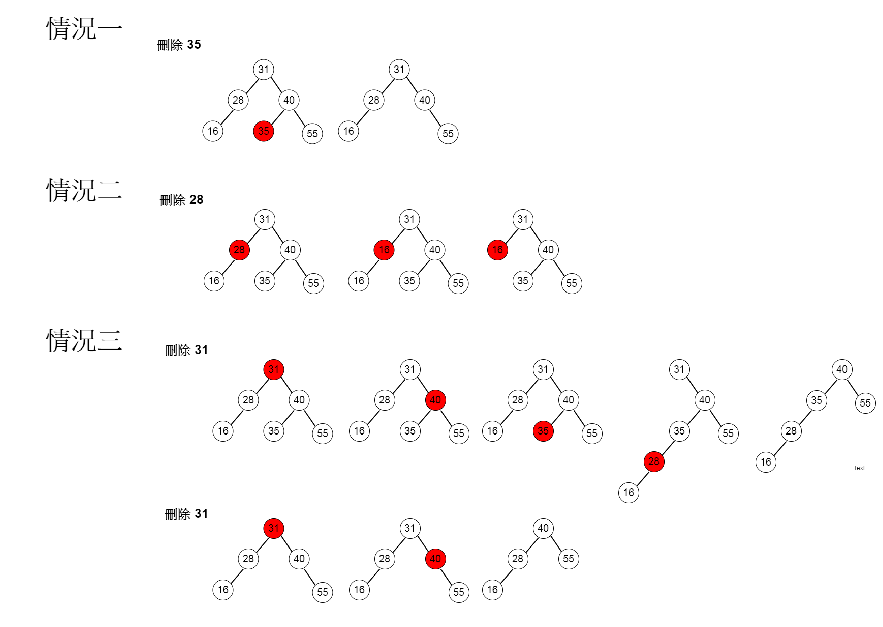

In [41]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
os.chdir(r'C:\Users\user\Desktop\資料結構\Tree\graph')
plt.figure(figsize=(15,15))
g = mpimg.imread(r'.\delete.png')
plt.axis('off')
plt.imshow(g)

刪除的方式分成三種情況去討論。  
1. 欲刪除的節點無任何子節點: 直接將該節點刪除。
2. 欲刪除的節點僅有一個子節點: 該節點以其子節點取代。
3. 欲刪除的節點有兩個子節點: 先往欲刪除的節點的右邊子節點走訪一格。如果走訪到的節點沒有左節點，直接將該節點取代欲刪除的節點，結束。不然就接著不斷往左邊的子節點走訪直到走訪到的節點無左節點為止，然後將欲刪除的節點的左節點接在該節點的左邊，此時欲刪除的節點僅剩右子節點，最後將欲刪除的節點以其柚子節點取代。

程式碼僅pre-order走訪有參考外部資料，其他部分都為原創程式碼。

1. 輸入欲刪除數值的樹狀結構的根節點和欲刪除的數值進入delete函式中
2. 先訪尋到數值與欲刪除的數值相同的節點，如果均無訪尋到則不做刪除，訪尋方式為深度搜尋。
3. 接著分三種情況討論。  
第一種，欲刪除的節點無任何子節點，如果該節點位於其父節點的右節點，則將其父節點的右節點設為None，反之將其父節點的左節點設為None。如果該節點無父節點則將該節點的數值設為None。  
第二種，欲刪除的節點僅有一個子節點。如果該節點僅有右節點，則將該節點的數值設為與其右節點相同的數值，並將該節點的右節點設為其右節點的右節點，左節點設為其右節點的左節點；如果該節點僅有左節點，則將該節點的數值設為與其左節點相同的數值，並將該節點的右節點設為其左節點的右節點，左節點設為其左節點的左節點。  
第三種，欲刪除的節點有兩個子節點。先往該節點的右節點走訪一格，如果走訪到的節點沒有左節點，將欲刪除的節點的數值設為與其右節點相同的數值，並將該節點的右節點設為其右節點的右節點，左節點設為其右節點的左節點，結束。不然就接著不斷往左邊的子節點走訪直到走訪到的節點無左節點為止，然後將最後走訪到的節點的左節點設為欲刪除的節點的左節點，最後將欲刪除的節點的數值設為與其右節點相同的數值，並將該節點的右節點設為其右節點的右節點，左節點設為其右節點的左節點，結束。
4. 如果樹狀結構中有超過一個節點有相同的數值，則反覆做第3點直到search不到該數值為止。
5. 最後為了不讓刪除完樹高變得太高，如果刪除後的樹狀結構的樹高有變高，會進行rebuild調整，原理與modify時幾乎相同。  
利用pop函數訪尋所有節點(pre-order走訪)並將訪尋到的節點的數值append進init中的陣列r中。  
利用max_height函數計算原本樹狀結構的樹高，計算方式是先設一個初始高度，用pre-order走訪所有節點，每走訪一個父節點高度就加一，當走訪到最後的葉節點時(無任何子節點)再加一並將高度append進init裡的陣列h中。當依序走訪完所有葉節點時，陣列理會有多的不同的高度，再取一個最大值當作該樹狀結構的最大高度。  
接著用個種排序方式去insert陣列r中的數值，建立不同樹狀結構，只要有樹狀結構小於等於原本樹狀結構，就返回這個樹狀結構。第一種排序方式是用median函數排序，方法是先將數列r按大小排序，append中位數進init中的陣列m中，接著以該中位數為中心點分成兩個陣列，並分別append陣列的中位數進陣列m中，並再將該兩個陣列各自分成兩個陣列append中位數，以此類推，最後再將陣列m中數值依序insert建立樹狀結構，如果該樹狀結構的樹高小於等於原來的樹高則做為最後樹狀結構。該方法的目的是為了平衡地新增數值讓樹狀結構達到平衡。  
如果第一種方法無法讓樹高小於等於原來樹高，則將陣列r做20種隨機排序，如果有一種排序能使樹高小於等於原來的樹高就以該排序去建立樹狀結構，如果均無法小於等於則回傳能使樹高最小的排序的數列。  
最後再將原本輸入的樹狀結構的數值全部刪除，並用前面方法找到的數列去insert數值，重新建立新的樹狀結構。


In [43]:
import copy
root1=copy.deepcopy(n)
Solution().pre_order(root1)
print('\n',Solution().max_height(root1))

root2=Solution().delete(n,6)
Solution().pre_order(root2)
print('\n',Solution().max_height(root2))

12 6 6 6 9 7 8 10 18 16 14 17 26 20 22 23 28 
 6
20 7 17 12 9 8 10 14 16 18 28 22 26 23 
 6


# 參考資料

### 1. 使用資料結構Python 第7章 7-20，李淑馨 著，深石出版社